This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that all cells are tagged such that the unittest routine can recognise them. Before you sumbit your solution, make sure every cell has its (correct) tag!

You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=';')
X, y = Z[:,:-1], Z[:,-1]

<h3 style="color:rgb(210,90,80)">Task 1.1:</h3>

Now visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the $x_1$ and $x_2$ coordinates of the data.<br>
The last column provides the labels $y$ ($\pm1$) of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

<h3 style="color:rgb(210,90,80)">Code & Question 1.1 (10 points):</h3>

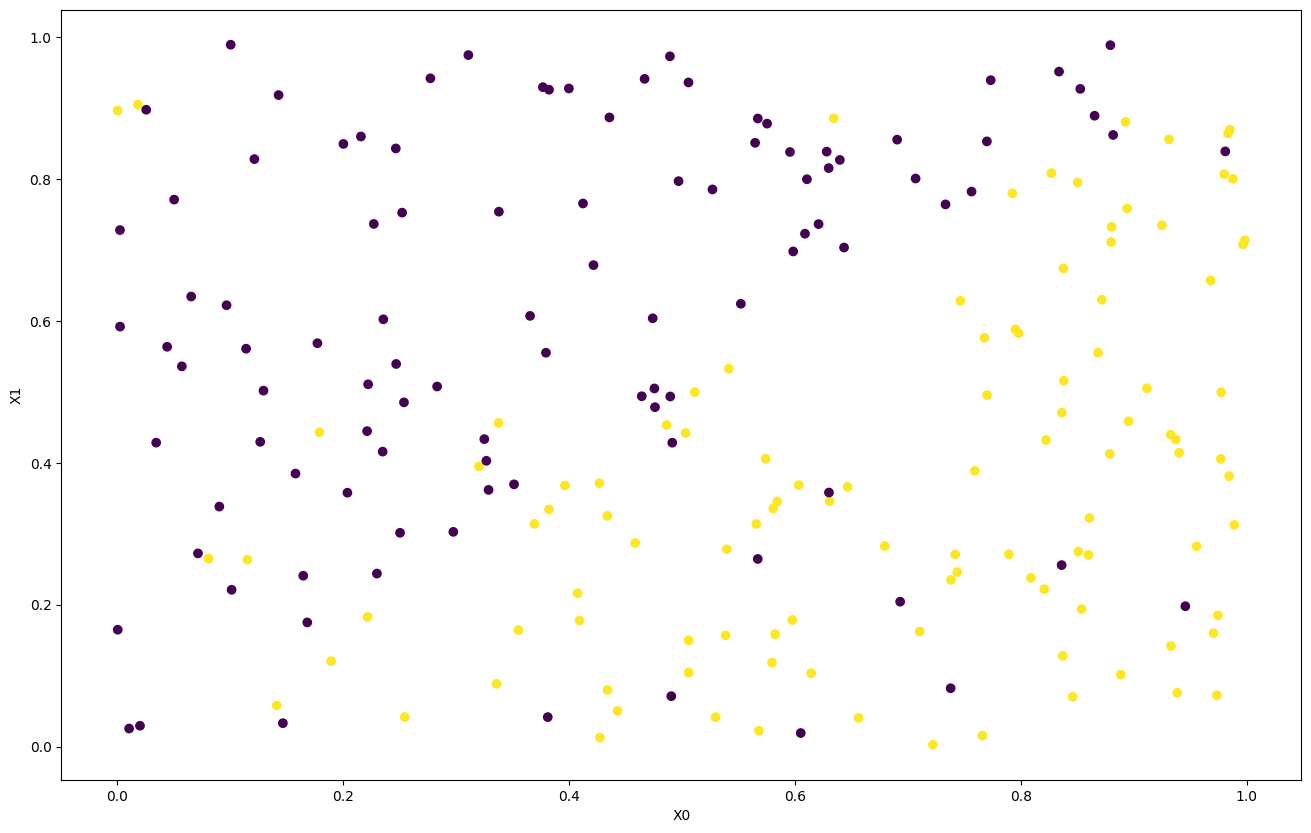

In [3]:
# your code goes here ↓↓↓
plt.figure(figsize=(16,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

***Answer the following yes/no questions concerning the distribution of the data:***<br>

**Are the two classes linearly seperable?**<br>

a_) Yes<br>
b_) No<br>

**Are there any outliers?**<br>

c_) Yes<br>
d_) No<br>

**Would outliers affect a kNN algorithm if k is small (<= 2)?**<br>

e_) Yes<br>
f_) No<br>


To answer the question assign to variables in the next cell "True" or "False" boolean values. 
To earn points, assign values to all variables. Note: Do not reuse these variable names. They are used for testing.

In [4]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_ = True
b_ = False

c_ = True
d_ = False

e_ = True
f_ = False

<h3 style="color:rgb(210,90,80)">Question 1.2 (5 points):</h3>

***Which of the following statements about $k$-nearest neighbors are correct?***<br>
(Multiple answers might be correct)

g_) requires very long training time already for small data sets <br>
h_) not suited for large datasets<br>
i_) sensitive to the rescaling of individual features<br>
j_) has many trainable model parameters <br>

In [5]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
g_ = False
h_ = True
i_ = True
j_ = False

<h2 style="color:rgb(0,120,170)">Task 2: Training the model</h2>

Now we want to put the kNN into action. To this end, work through the following points

* Implement `train_kNN` which fits newly created instance of `KNeighborsClassifier` (`sklearn`) to some training data
* Complete `eval_kNN`such that it outputs the prediction for some input data using a passed classifier
* Program the function `mean_zero_one_loss` that calculates the mean zero one loss (see lecture slides) of predicted values and samples from the test set
* Put all of this functions together in `run_kNN` to fit a model to training data, make predictions on left our data and compute the loss for these predictions. To split the dataset into train and test sets, use 10-fold cross validation (CV), loop over all the splits and collect the mean error for each split.

At the end of this task, visualize the mean error for $k \in \{1,3,5,...,177,179\}$ in a plot and answer the following questions.

In [6]:
from sklearn.model_selection import KFold
from sklearn import neighbors

<h3 style="color:rgb(210,90,80)">Code 2.1 (5 points):</h3>

In [7]:
"""
Function that fits a kNN to given data
@param X_train, np array, training data
@param y_train, np array, training labels
@param k_train, integer, k for the kNN

@output classifier, kNN instance, classifier that was fitted to training data
"""
def train_kNN(X_train,y_train,k_train): 
    #your code goes here ↓↓↓
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k_train)
    classifier.fit(X_train,y_train)
    return classifier 

<h3 style="color:rgb(210,90,80)">Code 2.2 (5 points):</h3>

In [8]:
"""
Function that returns predictions for some input data
@param classifier, kNN instance, trained kNN classifier
@param X_eval, np array, data that you want to predict the labels for

@output predicitons, np array, predicted labels
"""
def eval_kNN(classifier, X_eval): 
    predictions = classifier.predict(X_eval)
    return predictions

<h3 style="color:rgb(210,90,80)">Code 2.3 (5 points):</h3>

In [9]:
"""
Function that calculates the mean zero-one loss for given true and predicted labels
@param y_true, np array, true labels
@param y_pred, np array, predicted labels

@output loss, float, mean zero-one loss
"""
def mean_zero_one_loss(y_true, y_pred):
    #your code goes here ↓↓↓
    loss = sklearn.metrics.zero_one_loss(y_true, y_pred).mean()
    return loss

<h3 style="color:rgb(210,90,80)">Code 2.4 (5 points):</h3>

In [10]:
"""
Function that combines all functions using CV
@param X, np array, training data
@param y, np array, training labels
@param nf, integer, number of folds for CV
@param k, integer, k for kNN

@output mean_error, float, mean error over all folds
"""
def run_kNN(X,y,nf,k):
    #your code goes here ↓↓↓
    fold = KFold(n_splits=nf)
    mean_error = 0
    for train_index, test_index in fold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        classifier = train_kNN(X_train, y_train, k)
        y_preds = eval_kNN(classifier, X_test)
        mean_error += mean_zero_one_loss(y_test, y_preds)
    mean_error /= nf
    return mean_error

In [11]:
# Nothing to do here - just run this cell
m = 179
nf = 10
error_holder = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder.append(run_kNN(X,y,nf,k))

<h3 style="color:rgb(210,90,80)">Code & Question 2.5 (5 points):</h3>

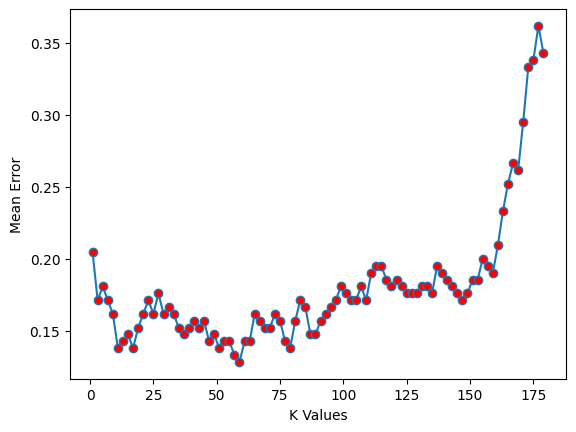

In [12]:
#implement the plot as described in the task description
plt.plot(range(1,m+1,2), np.array(error_holder), marker='o', markerfacecolor='r')
plt.xlabel('K Values') 
plt.ylabel('Mean Error')
plt.show()

***Answer the following questions about the plot you just created:***<br>

**What range for $k$ holds the lowest errors (on average) - by visual inspection?**<br>

k_) [0,5]<br>
l_) [50,60]<br>
m_) [150,175]<br>

**Is the error larger for $k$=175 or for $k$=1?**<br>

n_) 175<br>
o_) 1<br>

In [13]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
k_ = False
l_ = True
m_ = False

n_ = True
o_ = False

<h3 style="color:rgb(210,90,80)">Question 2.6 (10 points):</h3>

<i><b>Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ leads to complex models? Why?</b></i><br>
(Multiple answers might be correct)

p_) Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
q_) Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
r_) Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
s_) Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

t_) Very small values of $k$ correspond lead to underfitting <br>
u_) Very small values of $k$ correspond lead to overfitting <br>
v_) Very large values of $k$ correspond lead to underfitting <br>
w_) Very large values of $k$ correspond lead to overfitting <br>

In [14]:
#your answers go here ↓↓↓
p_ = False
q_ = False
r_ = True
s_ = False

t_ = False
u_ = True
v_ = True
w_ = False

<h2 style="color:rgb(0,120,170)">Task 3: Adding noise to dataset</h2>

To make things more interesting, mix up the dataset a bit:

* Implement `generate_flip_vector` which should return an array of length $n$ where exactly $\left \lfloor{n/6}\right \rfloor $ entries as $-1$ and the rest are $1$
* Now implement `flip_labels` that flips the labels according to the flip vector


Then perform the same steps as before, i.e. plot the data and plot the error (estimated via the empirical risk) vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code 3.1 (10 points):</h3>

In [15]:
"""
Function that produces a flip vector consisting of -1's and 1's (1/6,5/6)
@param n, integer, the length of the vector that should be returned

@output flip_vector, np array, the vector that indicates what labels will be flipped
"""

def generate_flip_vector(n):
    #your code goes here ↓↓↓
    flip_vector = np.ones(n)
    flip_vector[np.random.randint(low=0, high=n, size=int(n//6))] = -1
    return flip_vector

<h3 style="color:rgb(210,90,80)">Code 3.2 (5 points):</h3>

In [16]:
"""
Function that flips labels given a flip vector
@param y, np array, labels to flip (don't forget to copy the data in order not to alter the original labels)
@param flip_vector, np array, array that should be used to flip the labels

@output flipped_labels, np array, the labels where 1//6 labels are flipped
"""
def flip_labels(y,flip_vector):
    #your code goes here ↓↓↓
    # y[np.where(flip_vector == -1)[0]] *= -1
    print(y.shape, flip_vector.shape)
    flipped_labels = np.multiply(y, flip_vector)
    return flipped_labels

In [17]:
#define new y vector by calling flip function
fl_vec = generate_flip_vector(len(y))
y_fl = flip_labels(y,fl_vec)

error_holder_flipped = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder_flipped.append(run_kNN(X,y_fl,nf,k))

(210,) (210,)


<h3 style="color:rgb(210,90,80)">Plot & Question 3.3 (10 points)</h3>

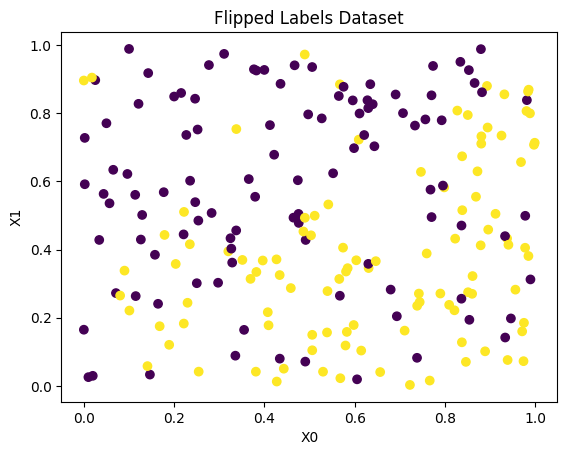

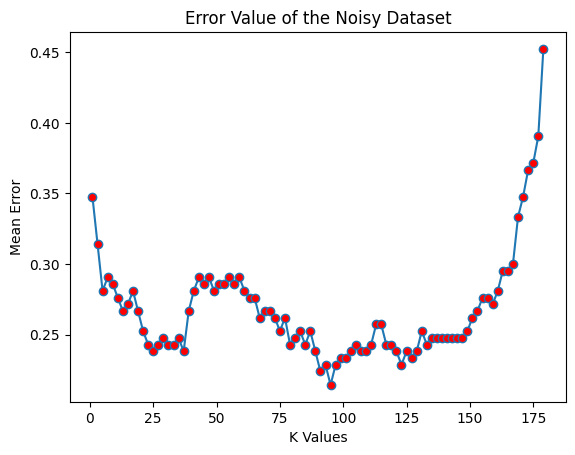

In [18]:
#your plotting code goes here ↓↓↓
plt.scatter(X[:, 0], X[:, 1], c=y_fl)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Flipped Labels Dataset')
plt.show()

plt.plot(range(1,m+1,2), np.array(error_holder_flipped), marker='o', markerfacecolor='r')
plt.xlabel('K Values') 
plt.ylabel('Mean Error')
plt.title('Error Value of the Noisy Dataset')
plt.show()

***Which differences do you observe?<br>
Which conclusions do you draw from that?***
<br>(Multiple answers might be correct)


x_) The two classes are well seperable and have nearly no overlap <br>
y_) The two classes are now less seperable and have a larger overlap <br>

z_) Random label flipping brings noise into the data <br>
a2_) Random label flipping simply swaps data, but does not add noise <br>

b2_) Overall, the error remains nearly unchanged compared to the original data set. <br>
c2_) Overall, the error increases compared to the original data set. <br>

To answer the question assign to variables in the next cell "True" or "False" boolean values. To earn points, assign values to all variables. Note: Do not reuse these variable names. They are used for testing.

In [19]:
#your answers go here ↓↓↓
x_ = False
y_ = True

z_ = True
a2_ = False

b2_ = False
c2_ = True

<h2 style="color:rgb(0,120,170)">Task 4: k-NN in higher dimensions</h2>

Going back to unflipped labels: Write a function "add_features(X)" which will add 4 additional features $x_3,x_4,x_5,x_6$ to the matrix X, calling the resulting matrix X_new. Each of the new features should be uniformly distributed between $0$ and $1$.<br>

As before, plot the error versus $k$ for 10-folds CV for with 1, 2, 3, 4 incrementally added features. (4 plots) <br>

Additionaly, for the particular choice $k=11$, plot the mean error versus $f$ with $f = 2,3,4,5,6$ the number features. Thus, the first data point (where $f=2$) shows the error for the original feature matrix X without extra dimensions.<br>

<h3 style="color:rgb(210,90,80)">Code 4.1 (10 points):</h3>

In [20]:
"""
Function that adds random features to dataset
@param X, np array, dataset

@output X_new, np array, dataset enhanced with 4 random features
"""
def add_features(X):
    np.random.seed(1234)
    #your code goes here ↓↓↓
    return np.concatenate((X, np.random.rand(X.shape[0], 4)), axis=1)

In [21]:
#define new feature matrix by calling add_features function
X_new = add_features(X)

<h3 style="color:rgb(210,90,80)">Code & Question 4.2 (15 points):</h3>

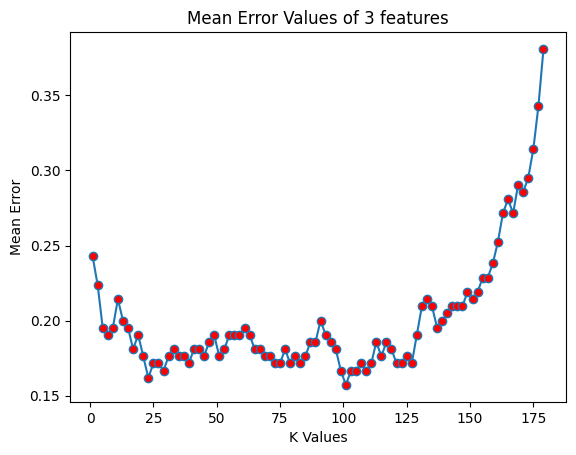

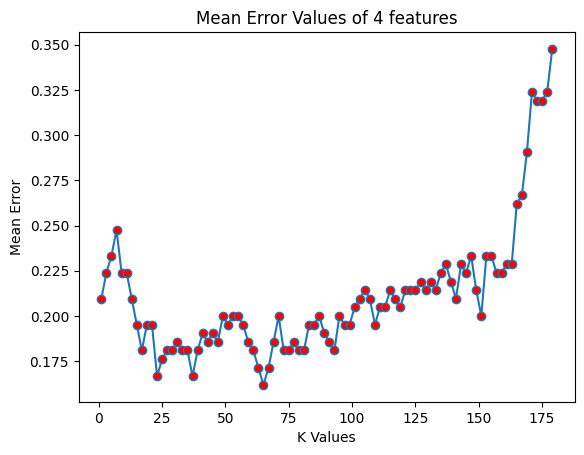

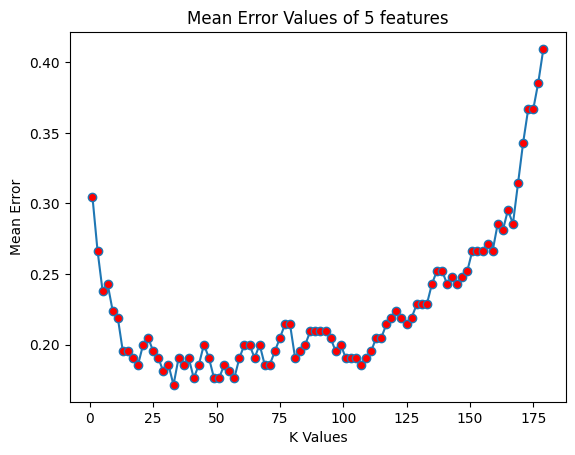

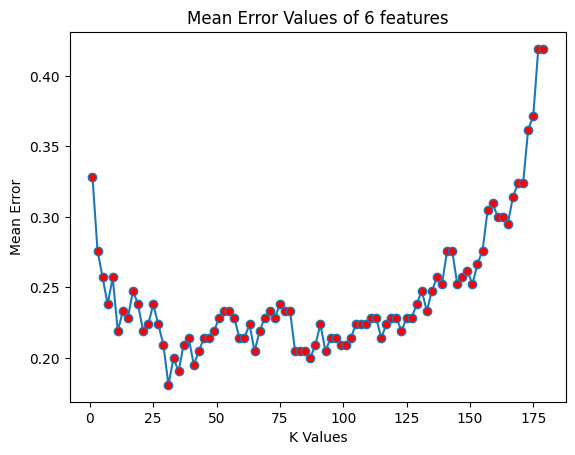

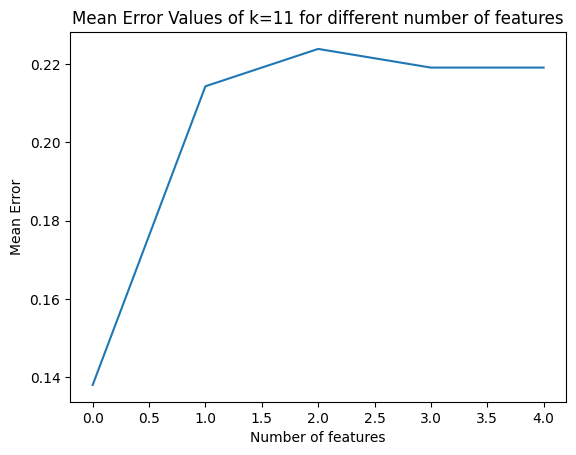

In [22]:
#your code goes here ↓↓↓
new_error_holder = [error_holder, error_holder, [], [], [], [], []]
for i in range(2,7):
    for k in range(1,m+1,2):
        new_error_holder[i].append(run_kNN(X_new[:,:i].reshape(len(X_new), i),y,nf,k))
    if i>2:
        plt.plot(range(1,m+1,2), np.array(new_error_holder[i]), marker='o', markerfacecolor='r')
        plt.xlabel('K Values') 
        plt.ylabel('Mean Error')
        plt.title(f'Mean Error Values of {str(i)} features')
        plt.show()

plt.plot(range(5), np.array(new_error_holder)[2:,5])
plt.xlabel('Number of features') 
plt.ylabel('Mean Error')
plt.title(f'Mean Error Values of k=11 for different number of features')
plt.show()

***Try to explain possible changes of the error.***

d2_) $k$-nearest neighbors is robust against randomly added further features; noise is filtered out <br>
e2_) $k$-nearest neighbors is not robust aginst randomly added further features; the error increases if extra dimension(s) with noise are added

f2_) Error seems to increase with growing number of features<br>
g2_) Error seems to to decrease with growing number of features<br>
h2_) Error seems to stay the same with any number of features<br>

In [23]:
#your answers go here ↓↓↓
d2_ = False
e2_ = True

f2_ = True
g2_ = False
h2_ = False